 
<font size=10>NEGI-Course Andøya 2018</font>

This cell is hidden as we generate the title using metadata (see below)

# General structure

- Project title
- Name, email, course title, date, group assistant
- Abstract (1/2 page max)
- Introduction (1 page)
- Method
    - Packages used
    - Datasets (models and observations)
    - Analysis method
    - …
- Results
- Discussion and outlook (1 page)
- Conclusions (1/2 page)
- References
- Acknowledgments

# How to generate pdf report

## Markdown 

- Select Markdown cell instead of code cell
- [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


## Add a report title

- Edit --> Edit Notebook Metadata

```bash
 "ipub": {
    "bibliography": "/mnt/data/teachers/annefou/test_report.bib",
    "titlepage": {
      "author": "Anne Fouilloux",
      "email": "authors@email.com",
      "institution": [
        "Institution1",
        "Institution2"
      ],
      "logo": "/mnt/data/teachers/annefou/NEGI2018.png",
      "subtitle": "Example for writing your report",
      "supervisors": [
        "First Supervisor",
        "Second Supervisor"
      ],
      "tagline": "A tagline for the report.",
      "title": "Climate science at high latitudes: Modeling and model evaluation"
    }
  },
```

## Hide a cell output

View --> Cell Toolbar --> Edit Metadata

And add:

```bash
  "ipub": {
    "ignore": true
  }
```

## Add Code block

In the Cell metadata:

```bash
"ipub": {
  "code": {
    "format" : {},
    "asfloat": true,
    "caption": "",
    "label": "code:example_code",
    "widefigure": false,
    "placement": "H"
    }
  }
```

## Add a latex reference

### Figures

There are two ways to reference plots:

1. Use latex syntax:

-  Save your figure in a code cell:

```python
fig.savefig('fig_example.png') ;
```
where fig is a matplotlib figure (fig = plt.figure ( figsize =[12 ,5])).

- Reference your plot in a markdown cell:




In both cases, you can reference your plots using latex syntax `\ref`

### cite a paper

For all the paper in your bib file (added in the notebook metadata), you can use the following syntax to cite your paper:


- you can add a citation using latex citation `\cite`.


## Generate pdf with nbpublish

To convert your jupyter notebook into pdf, you need to use nbpublish. See last cell of this jupyter notebook.

```bash
!nbpublish -f latex_ipypublish_all -pdf report_example.ipynb
```

# Import python packages

In [1]:
import xarray as xr
import dask . array as da
import matplotlib . pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
%matplotlib inline


# Data and Methods
## Read Data

In [2]:
dset = xr.open_dataset('/mnt/data/students/evelien/Observations/air.mon.mean.seasonal.arctic.nc')

In [3]:
dset . time

<xarray.DataArray 'time' (time: 461)>
array(['1900-01-16T12:00:00.000000000', '1900-04-01T00:00:00.000000000',
       '1900-07-01T00:00:00.000000000', ..., '2014-07-01T00:00:00.000000000',
       '2014-10-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 1900-04-01 ... 2014-12-01
Attributes:
    standard_name:  time
    long_name:      Time
    bounds:         time_bnds
    axis:           T

### Select the nearest date

In [4]:
x = dset["air"].sel( time ="1989-01-01T00:00:00.000000000", method = 'nearest')


# Results


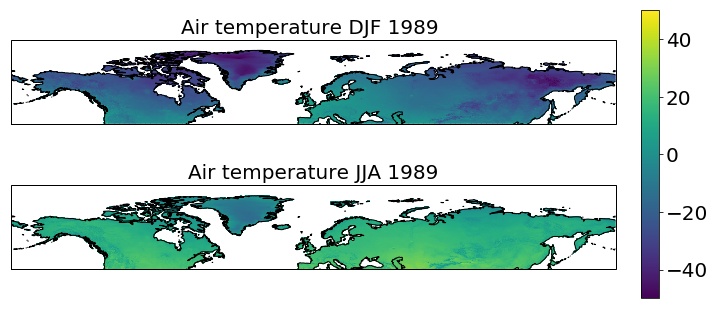

In [5]:
fig = plt . figure ( figsize =[12 ,5])
ax1 = fig . add_subplot (211 , projection = ccrs . PlateCarree () )
ax1 . coastlines ( resolution ="50m")


m1 = dset["air"].sel (time ="1989-01-01", method = 'nearest').plot( ax = ax1 , transform = ccrs.PlateCarree() , vmin =-50 , vmax =50 , add_colorbar =False )
 
ax1 . set_title ( 'Air temperature DJF 1989 ', fontsize =20)

ax2 = fig . add_subplot (212 , projection = ccrs . PlateCarree () )
ax2 . coastlines ( resolution ="50m")
m2 = dset ["air"]. sel ( time ="1989-07-01 T00:00:00.000000000", method = 'nearest') . plot ( ax = ax2 , transform = ccrs.PlateCarree () , vmin =-50 ,vmax =50 , add_colorbar = False )
ax2 . set_title ( 'Air temperature JJA 1989', fontsize =20)

fig . subplots_adjust ( bottom =0.1 , top =0.9 , left =0.1 , right =0.8 ,wspace =0.02 , hspace =0.02)
cb_ax = fig.add_axes ([0.83 , 0.1 , 0.02 , 0.8])
cbar = fig.colorbar ( m2 , cax = cb_ax)
cbar . ax . set_yticklabels ( cbar.ax.get_yticklabels() , fontsize =20)

# You can save your plots with savefig and for your pdf include your graphics using latex (see next cell)
# - To avoid having two plots in your pdf report, edit the cell metadata and add:
# ,
#  "ipub": {
#    "ignore": true
#  }
# Make sure you remove # in your metadata cell
#
fig.savefig('test_report.png') ;

\begin{figure}
  \includegraphics[width=\linewidth]{/mnt/data/teachers/annefou/test_report.png}
  \caption{A Nice plot.}
  \label{fig:plot_example}
\end{figure}

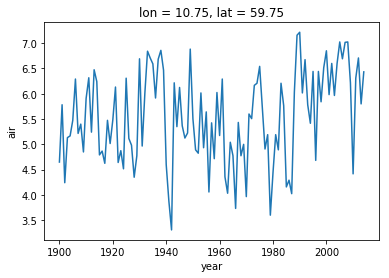

In [6]:
# Select one location and group by year to plot
# to get your plot in your report (with a label you can reference):
# - edit cell metadata
# - Add the following (customize label for your own plot)
# 
#
#"ipub": {
#    "figure": {
#      "caption": "Simple time serie over Oslo",
#      "label": "fig:oslo_timeserie"
#    }
#  }
#

# Add a semi-column at the end to suppress the output of the function
dset["air"].sel(lat=59.91,lon=10.74, method="nearest").groupby("time.year").mean(dim="time").plot();


And then you can reference your previous timeserie \ref{fig:oslo_timeserie}

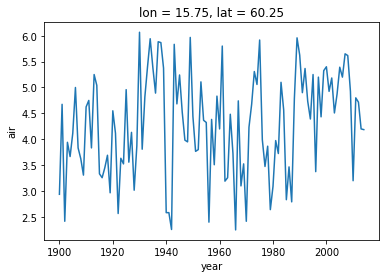

In [17]:
# Add a semi-column at the end to suppress the output of the function
# Andoya coordinates
dset["air"].sel(lat=60.0,lon=15.71, method="nearest").groupby("time.year").mean(dim="time").plot();

Timeserie over Andoya. See \ref{fig:andoya_timeserie}. The plot has been generated with \ref{code:example_code}.

# Discussion
Within a markdown cell, you can add a citation using latex citation \cite{allan:2000}.

You can also add equations:
\begin{equation}
    \qquad
    \frac{\partial p}{\partial z}=-\rho g\label{prim3}\end{equation}

The heat equation


\begin{equation}
    \frac{dQ}{dt}\equiv F_{T}=c_{p}\frac{dT}{dt}-\frac{\alpha T}{\rho}\frac{dp}{dt}\label{prim4}
    \end{equation}

The differential form of the heat equation (\ref{prim4})
without heating can be combined with the hydrostatic equation (\ref{prim3}) to give the temperature
equation for an adiabatic ascent of a parcel.

\begin{equation}
    \frac{dT}{dz}=-\Gamma\equiv\frac{g\alpha T}{c_{p}}\end{equation}


And you can make a reference to your plots. See Figure \ref{fig:plot_example} shows a nice plot.



# Acknowledgments

- model and data owners/providers

And make sure you acknowledge Sigma2:

- *This study was performed using jupyterhub deployed on resources provided by UNINETT Sigma2 - the National Infrastructure for High Performance Computing and Data Storage in Norway as part of NS1000K project. In particular, we would like to thank Thierry Toutain and Gurvinder Singh.*

In [65]:
#This cell needs to be executed twice (for references)
!nbpublish -f latex_ipypublish_all -pdf report_example.ipynb
!nbpublish -f latex_ipypublish_all -pdf report_example.ipynb

INFO:main:started ipypublish v0.6.7 at Tue Nov  6 20:43:55 2018
INFO:main:logging to: /mnt/data/teachers/annefou/converted/report_example.nbpub.log
INFO:main:running for ipynb(s) at: report_example.ipynb
INFO:main:with conversion: latex_ipypublish_all
INFO:nbmerge:Reading notebook
INFO:main:getting output format from exporter plugin
INFO:nbexport:running nbconvert
INFO:latex_doc_defaults:adding ipub defaults to notebook
INFO:split_outputs:splitting outputs into separate cells
INFO:latex_doc_links:resolving external file paths in ipub metadata to: report_example.ipynb
INFO:latex_doc_captions:extracting caption cells
INFO:main:outputting converted file to: /mnt/data/teachers/annefou/converted/report_example.tex
INFO:main:dumping external files to: /mnt/data/teachers/annefou/converted/report_example_files
INFO:main:running pdf conversion
INFO:pdfexport:running: latexmk -xelatex -bibtex -pdf --interaction=batchmode <outpath>
INFO:pdfexport:latexmk: Latexmk: This is Latexmk, John Collins, 1